In [1]:
import classes

Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 8715.06it/s]


 (768, 1024, 3) -> (192, 256, 3)


In [2]:
# ## from classes import *

# puzzle = Puzzle(MATCH_IMGS)
# corner_piece = puzzle.pieces[3]

# # Start BFS by adding in the bottom left corner piece
# queue = []
# queue.append(corner_piece)
# corner_piece.insert()
# corner_piece.inserted = True

# # Loop through self.edge_list of the corner piece and find the two flat edges (lets call them first_edge
# # and second_edge where second_edge is anti-clockwise of first_edge). first_edge.point2
# # should be the same coordinates as second_edge.point1

# # edges are in anti clock wise, so flat 1 flat 2, the mod operator is to make the index a rolling index (0-1 = 3)

# first_edge:Edge = None
# second_edge:Edge = None
# for i in range(4):
#     if(corner_piece.edge_list[i].is_flat == True):
#         if(corner_piece.edge_list[(i - 1) % 4].is_flat == True):
#             first_edge = corner_piece.edge_list[(i - 1) % 4]
#             second_edge = corner_piece.edge_list[i]
#         elif(corner_piece.edge_list[(i + 1) % 4].is_flat == True):
#             first_edge = corner_piece.edge_list[i]
#             second_edge = corner_piece.edge_list[(i + 1) % 4]
#         else:
#             raise Exception("Not a corner piece") 
# if(set(first_edge.point2) != set(second_edge.point1) ):
#     raise Exception("Flat edges dont share corner point")

# # add first edge point2

# # I dont know if i miss-understand, col,row major means that the bottom left is at 0,699, or is it 0,799?
# piece_height = abs(first_edge.point2[0] - first_edge.point1[0])
# piece_width = abs(second_edge.point2[1] - first_edge.point2[1])

# pts_src = [
#     first_edge.point2[::-1].tolist(),
#     first_edge.point1[::-1].tolist(),
#     second_edge.point2[::-1].tolist()
# ]
# pts_dst = [
#     [0,canvas.shape[0]-1],  # Bottom-left (scaled proportionally)
#     [0,799 - piece_height],  # Along left edge
#     [second_edge.point2[0].item(),canvas.shape[0]-1]  # Along bottom edge
# ]

# pts_src = np.array(pts_src,dtype=np.float32)
# pts_dst = np.array(pts_dst,dtype=np.float32)

# M = cv2.getAffineTransform(pts_src,pts_dst)
# corner_piece.dst = cv2.warpAffine(corner_piece.image,M,(700,800))
# mask_warped = cv2.warpAffine(corner_piece.mask,M,(700,800))

# # make it 3 channel to multiply with RGB image, then overlay it with the destination.
# mask_3_channel = cv2.merge([mask_warped, mask_warped, mask_warped])
# corner_piece.dst = mask_3_channel*corner_piece.dst 
# # plt.imshow(corner_piece.image)
# plt.imshow(corner_piece.dst)
# plt.show()

Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 5969.30it/s]



 (768, 1024, 3) -> (192, 256, 3)


Generating Pieces: 48it [00:00, 441.68it/s]


Updated piece type: corner
	 -> inside corner


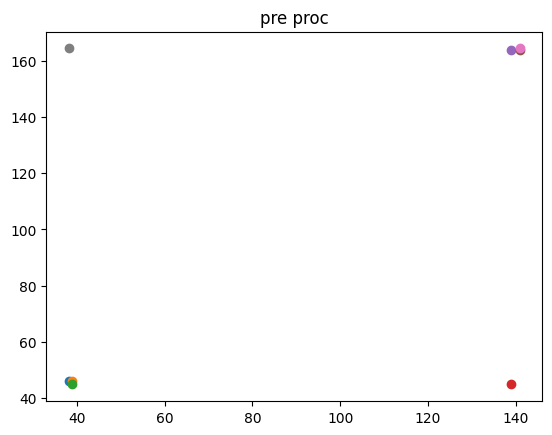

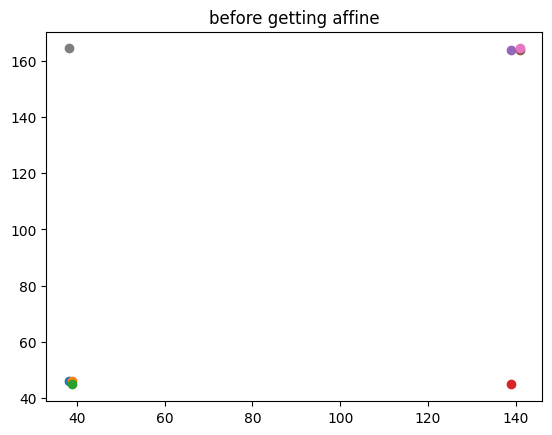



Final Destination Points: [[  0.      799.     ]
 [  0.      679.8747 ]
 [140.84547 799.     ]]




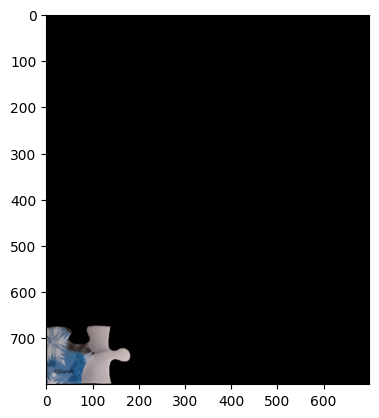

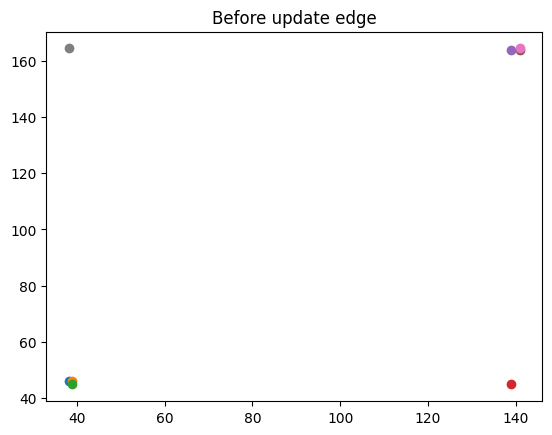

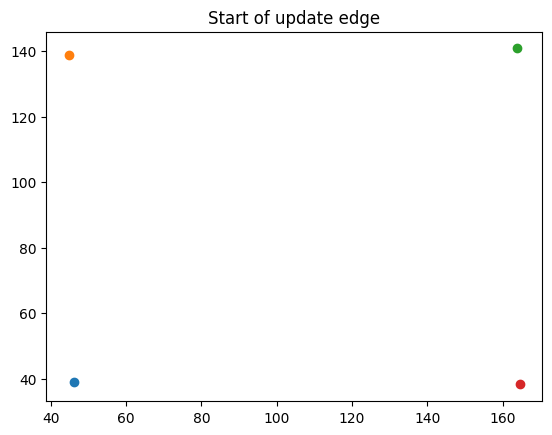

[46.08000183 38.87744236]
[46.08000183 38.87744236]
[ 44.71466827 138.7992897 ]
[ 44.71466827 138.7992897 ]
[163.83999634 140.84547043]
[163.83999634 140.84547043]
[164.5226593   38.19538307]
[164.5226593   38.19538307]


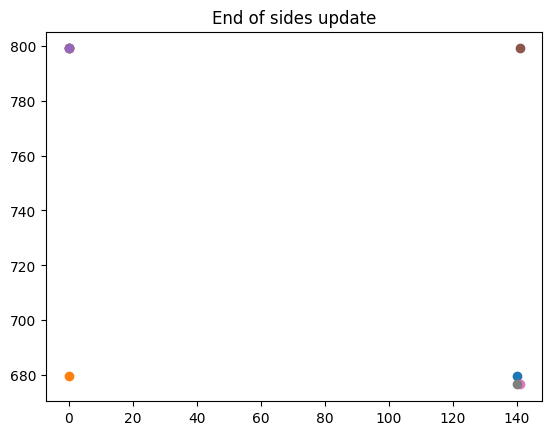

done inserting!
Updated piece type: edge
	 -> inside edge


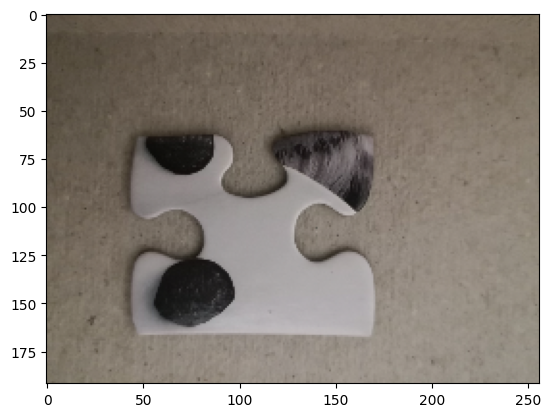

Connected edge found!, 3
EDGE :  <classes.Edge object at 0x000002170E4742C0>


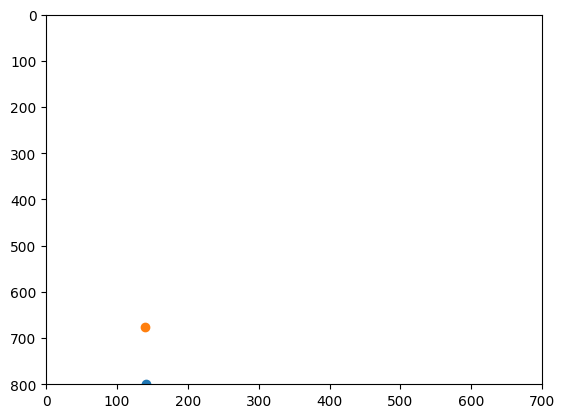

Edge lies along the bottom of the puzzle.


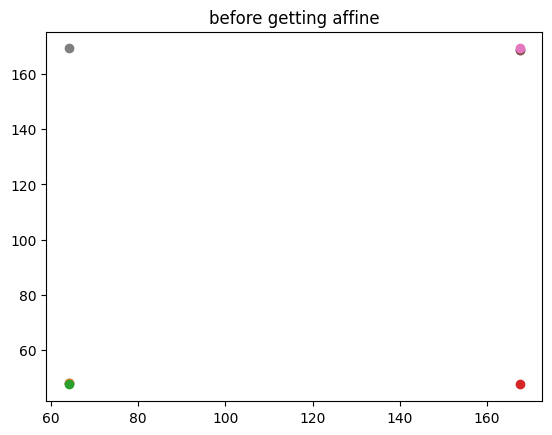



Final Destination Points: [[799.      140.84547]
 [676.63684 139.99446]
 [778.63684 139.99446]]




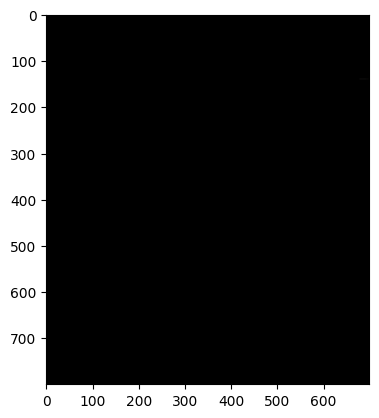

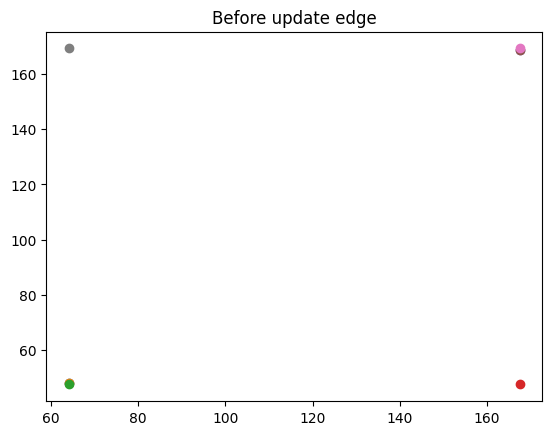

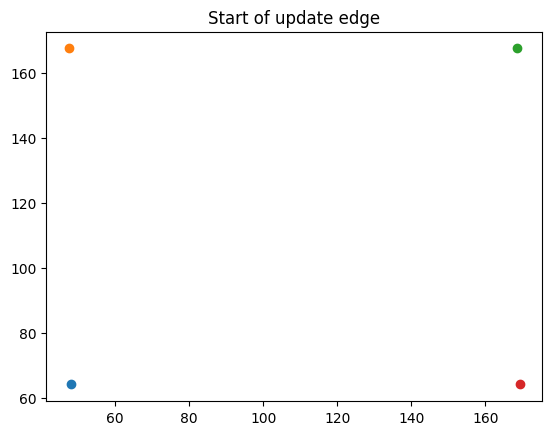

[48.12799835 64.11367607]
[48.12799835 64.11367607]
[ 47.44533157 167.4458313 ]
[ 47.44533157 167.4458313 ]
[168.6186676 167.4458313]
[168.6186676 167.4458313]
[169.30133057  64.11367607]
[169.30133057  64.11367607]


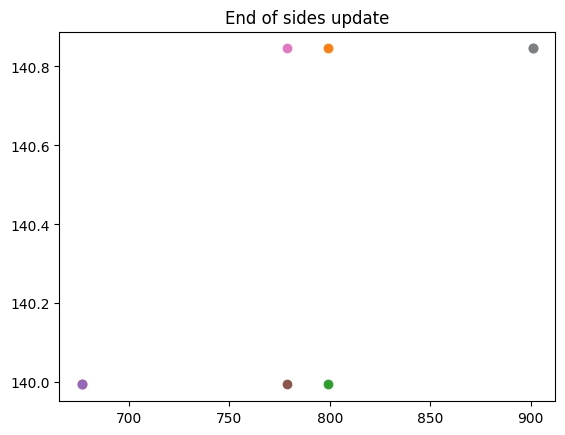

done inserting!


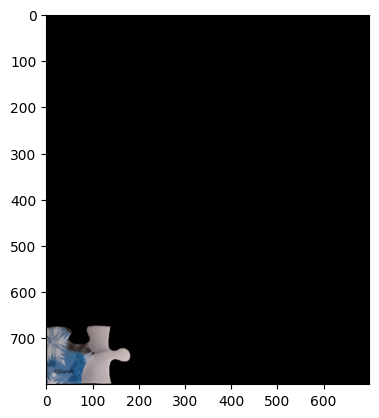

In [1]:
from classes import *
puzzle = Puzzle(MATCH_IMGS)
corner_piece = puzzle.pieces[3]
# corner_piece.piece_type = "corner"
corner_piece.insert()

e1 = puzzle.pieces[6]
# e1.piece_type  ="edge"
e1.insert()

plt.imshow(corner_piece.dst)
# e2 = puzzle.pieces[44]
# e2.piece_type  ="edge"
# e2.insert()

# e3 = puzzle.pieces[31]
# e3.piece_type  ="edge"
# e3.insert()



# plt.imshow(e1.dst)
# plt.show()

Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 5627.58it/s]



 (768, 1024, 3) -> (192, 256, 3)


Generating Pieces: 48it [00:00, 10592.23it/s]


Updated piece type: corner
	 -> inside corner


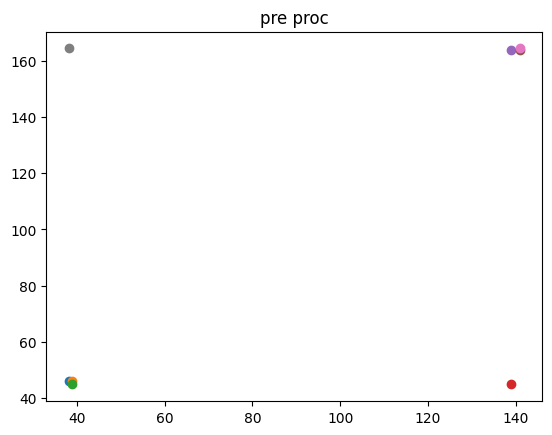

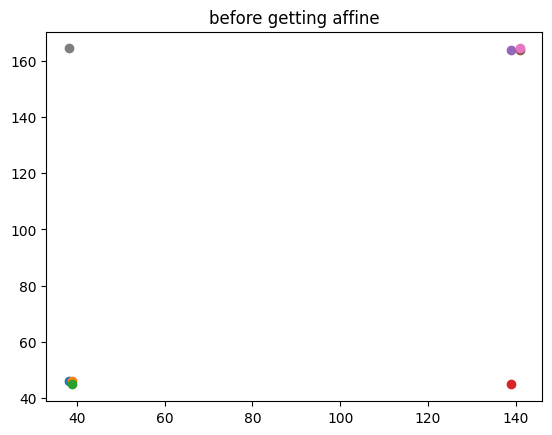



Final Destination Points: [[  0.      799.     ]
 [  0.      679.8747 ]
 [140.84547 799.     ]]




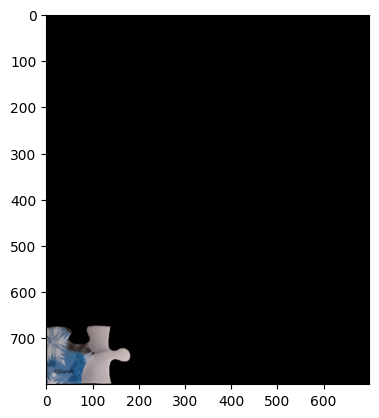

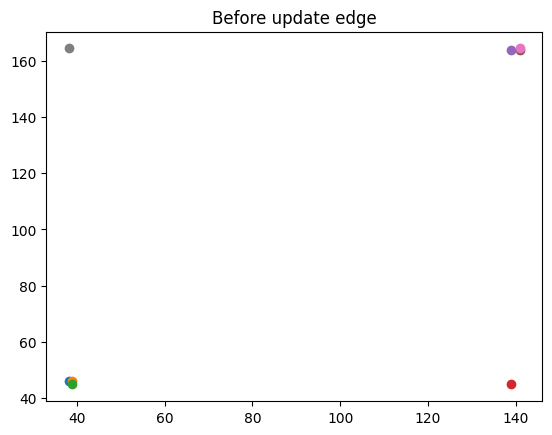

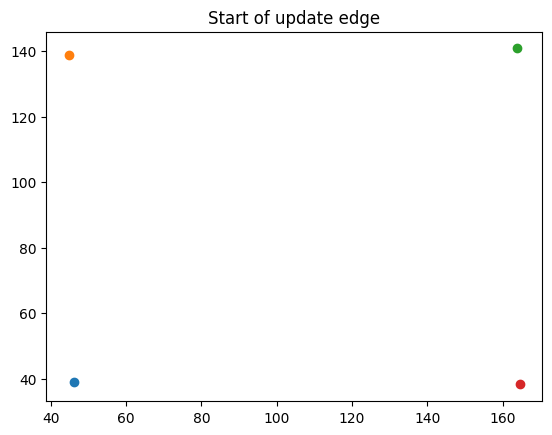

[46.08000183 38.87744236]
[46.08000183 38.87744236]
[46.08000183 38.87744236  1.        ]
CORNER SHAPE (2,)
[ 44.71466827 138.7992897 ]
[ 44.71466827 138.7992897 ]
[ 44.71466827 138.7992897    1.        ]
CORNER SHAPE (2,)
[163.83999634 140.84547043]
[163.83999634 140.84547043]
[163.83999634 140.84547043   1.        ]
CORNER SHAPE (2,)
[164.5226593   38.19538307]
[164.5226593   38.19538307]
[164.5226593   38.19538307   1.        ]
CORNER SHAPE (2,)


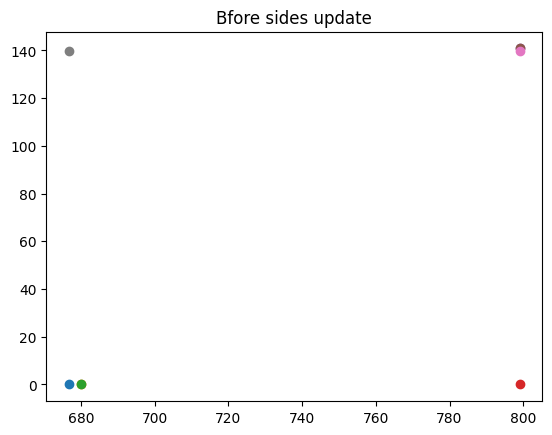

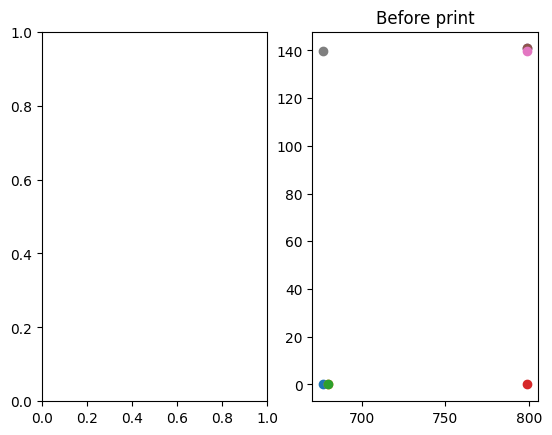

Edges
(2,)
[1438.10065855  121.31266807]
[1444.82596903  -44.11587152]
(2,)
[1444.82596903  -44.11587152]
[1586.81202776  -42.19180872]
(2,)
[1586.81202776  -42.19180872]
[1583.92847639  124.29497518]
(2,)
[1583.92847639  124.29497518]
[1438.10065855  121.31266807]


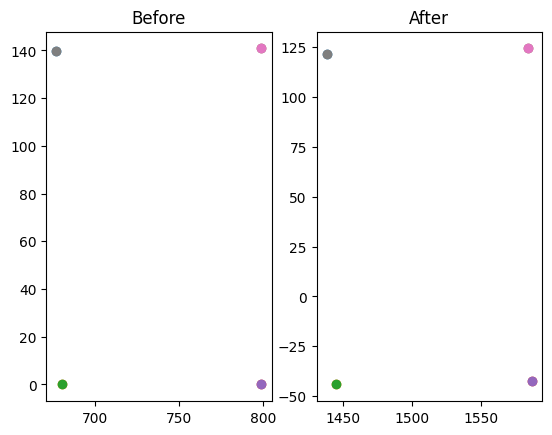

done inserting!
Corner Piece Coordinates:
(800, 700, 3)
Updated piece type: edge
	 -> inside edge


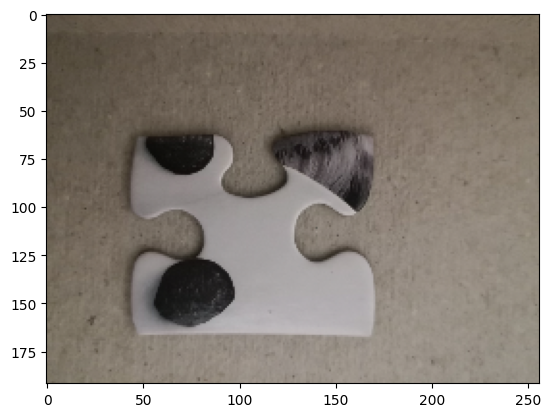

Connected edge found!, 3
EDGE :  <classes.Edge object at 0x0000018E92ABCB90>


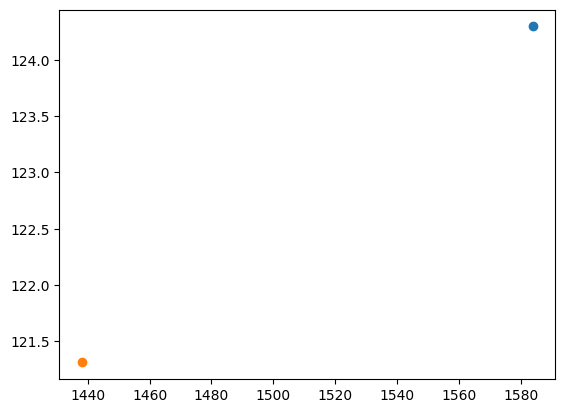

Edge lies along the left side of the puzzle.


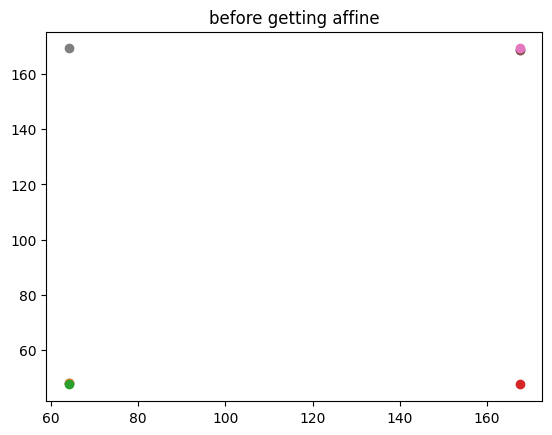



Final Destination Points: [[ 124.294975 1583.9285  ]
 [ 121.31267  1438.1007  ]
 [ 124.294975 1668.9285  ]]




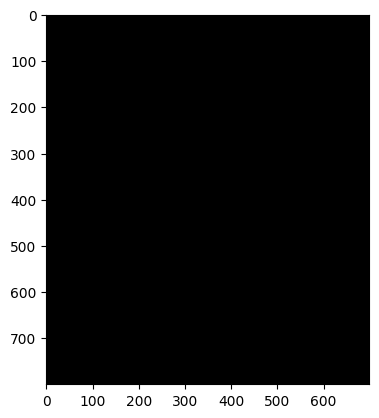

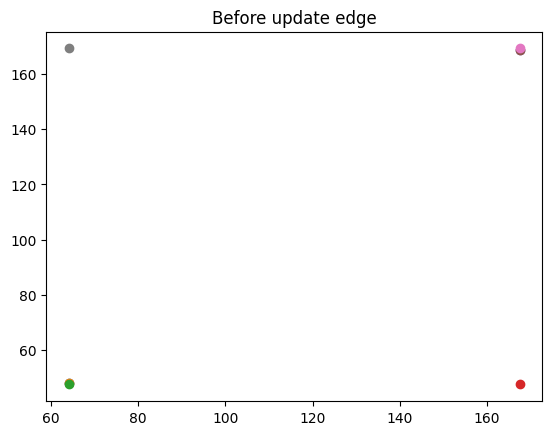

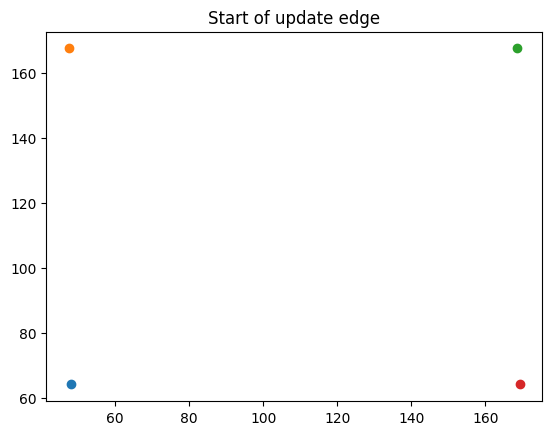

[48.12799835 64.11367607]
[48.12799835 64.11367607]
[48.12799835 64.11367607  1.        ]
CORNER SHAPE (2,)
[ 47.44533157 167.4458313 ]
[ 47.44533157 167.4458313 ]
[ 47.44533157 167.4458313    1.        ]
CORNER SHAPE (2,)
[168.6186676 167.4458313]
[168.6186676 167.4458313]
[168.6186676 167.4458313   1.       ]
CORNER SHAPE (2,)
[169.30133057  64.11367607]
[169.30133057  64.11367607]
[169.30133057  64.11367607   1.        ]
CORNER SHAPE (2,)


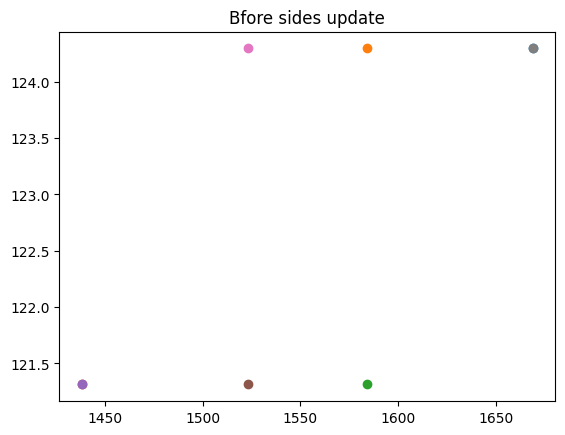

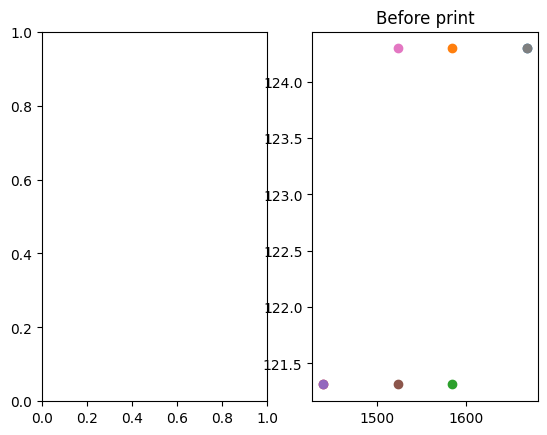

Edges
(2,)
[-620.00400445   77.97782298]
[-500.44145913   80.43103937]
(2,)
[-500.44145913   80.43103937]
[-297.40949124   84.63982824]
(2,)
[-297.40949124   84.63982824]
[-416.97204033   82.18661177]
(2,)
[-416.97204033   82.18661177]
[-620.00400445   77.97782298]


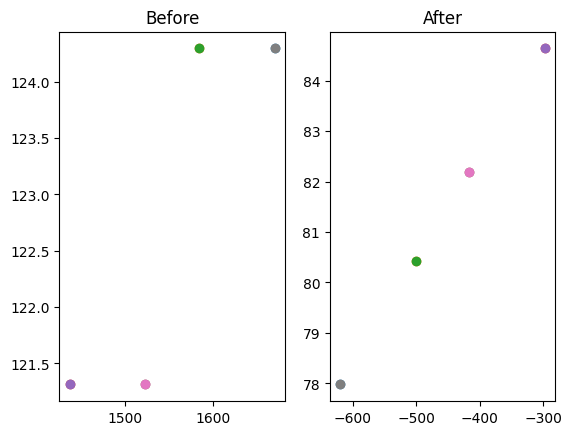

done inserting!


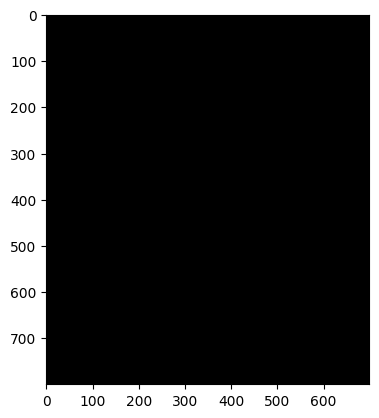

Updated piece type: edge
	 -> inside edge


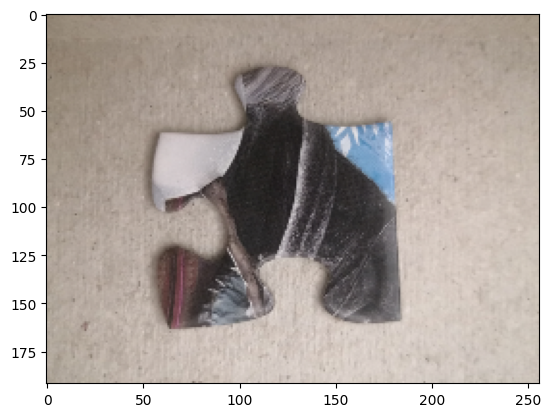

Connected edge found!, 3
EDGE :  <classes.Edge object at 0x0000018E92ABC620>


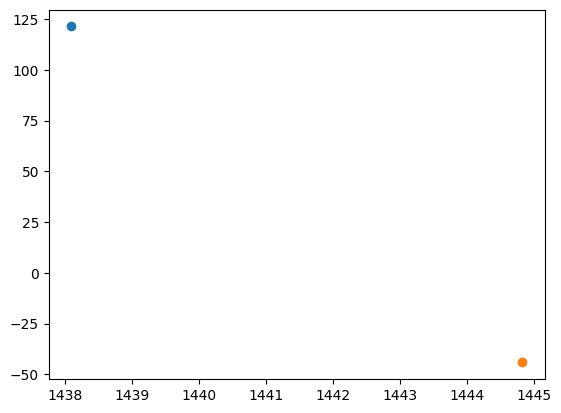

Edge lies along the bottom of the puzzle.


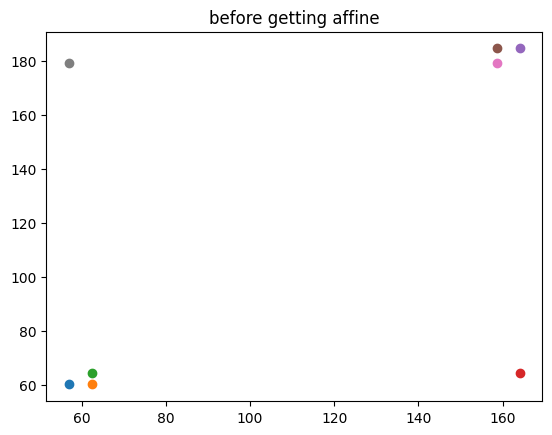



Final Destination Points: [[ 121.31267  1438.1007  ]
 [ -44.11587  1444.8259  ]
 [  28.884129 1444.8259  ]]




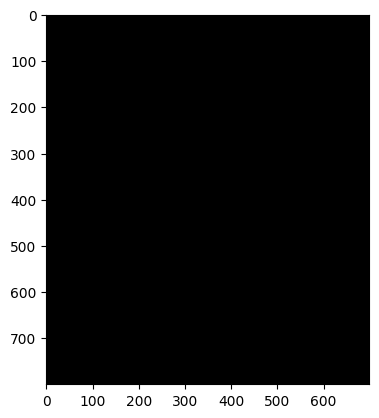

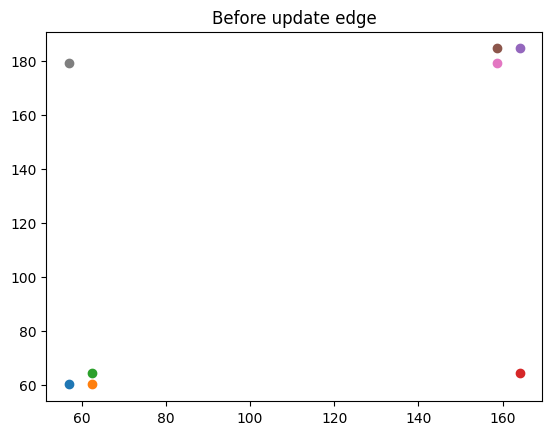

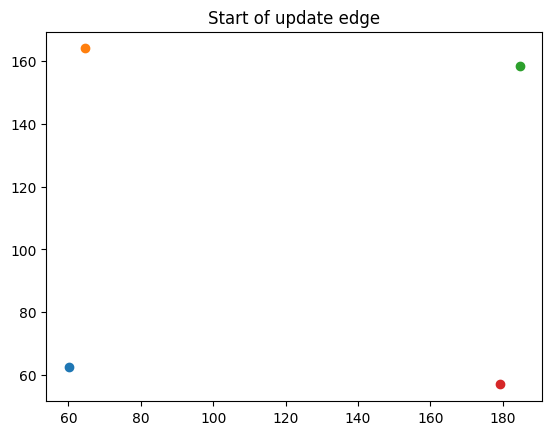

[60.07466507 62.40852356]
[60.07466507 62.40852356]
[60.07466507 62.40852356  1.        ]
CORNER SHAPE (2,)
[ 64.51200104 164.03552628]
[ 64.51200104 164.03552628]
[ 64.51200104 164.03552628   1.        ]
CORNER SHAPE (2,)
[184.66133118 158.57904053]
[184.66133118 158.57904053]
[184.66133118 158.57904053   1.        ]
CORNER SHAPE (2,)
[179.19999695  56.95204353]
[179.19999695  56.95204353]
[179.19999695  56.95204353   1.        ]
CORNER SHAPE (2,)


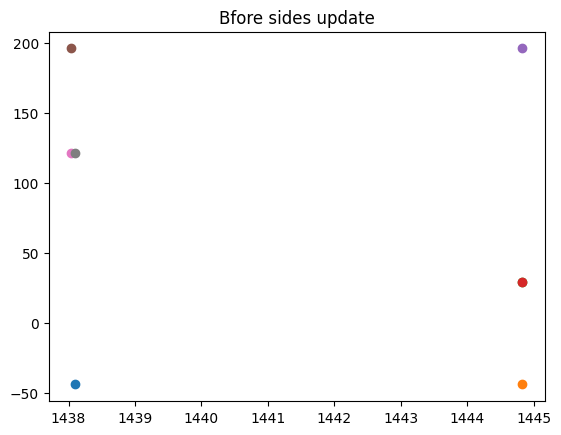

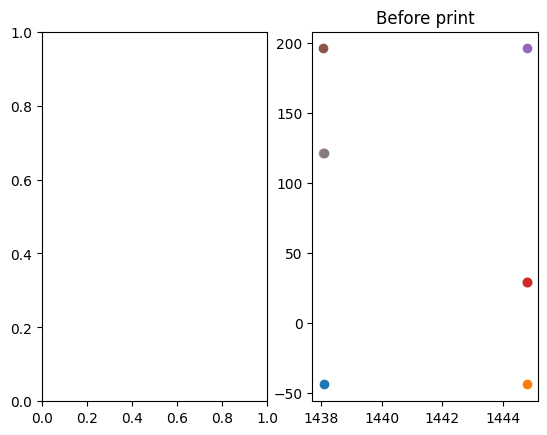

Edges
(2,)
[1444.75993928  945.72344131]
[1454.09710993  715.43462209]
(2,)
[1454.09710993  715.43462209]
[1449.98412116  819.00394143]
(2,)
[1449.98412116  819.00394143]
[1440.56495437 1051.31606567]
(2,)
[1440.56495437 1051.31606567]
[1444.75993928  945.72344131]


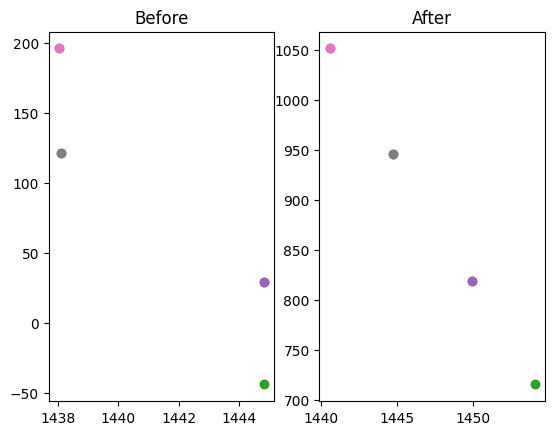

done inserting!


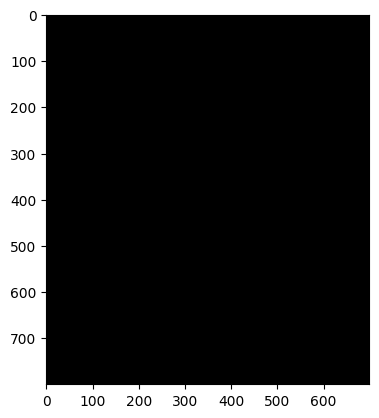

Updated piece type: edge
	 -> inside edge


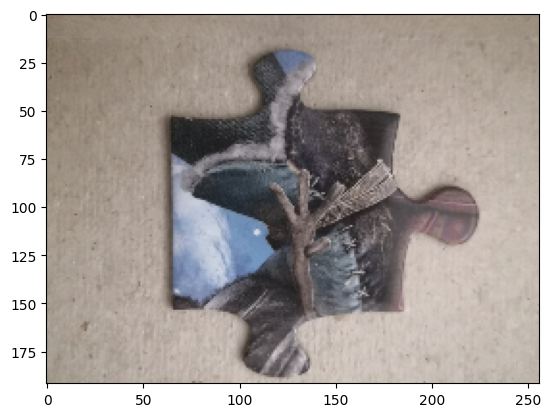

Connected edge found!, 44
EDGE :  <classes.Edge object at 0x0000018E92A9BAD0>


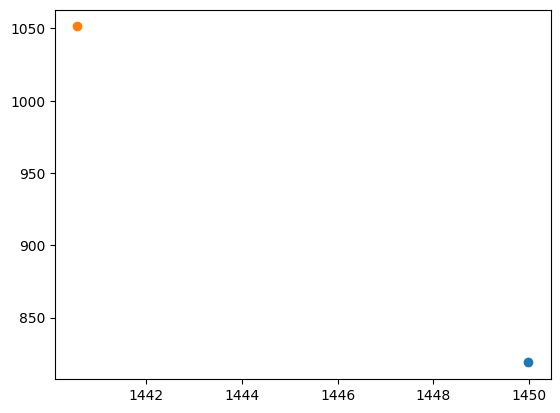

Edge lies along the left side of the puzzle.


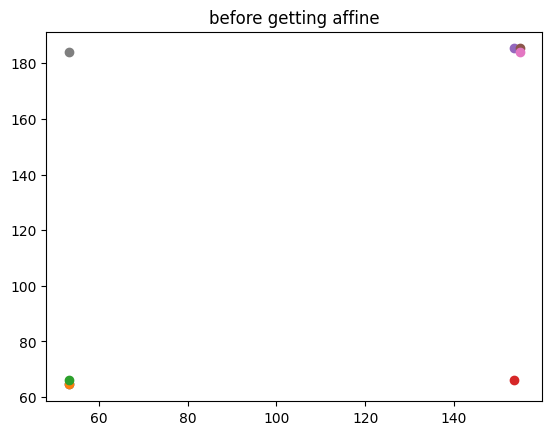



Final Destination Points: [[ 819.00397 1449.9841 ]
 [1051.316   1440.565  ]
 [ 819.00397 1500.9841 ]]




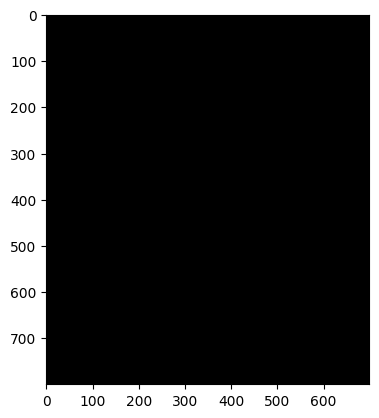

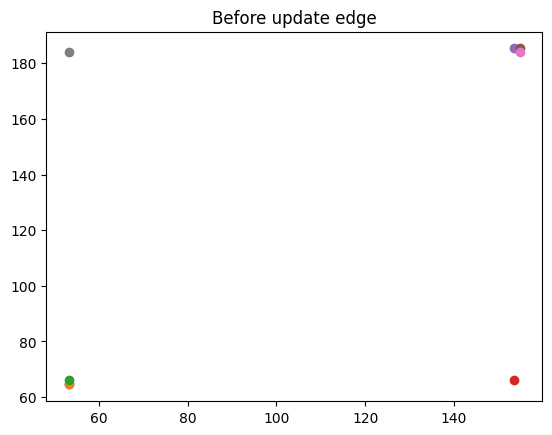

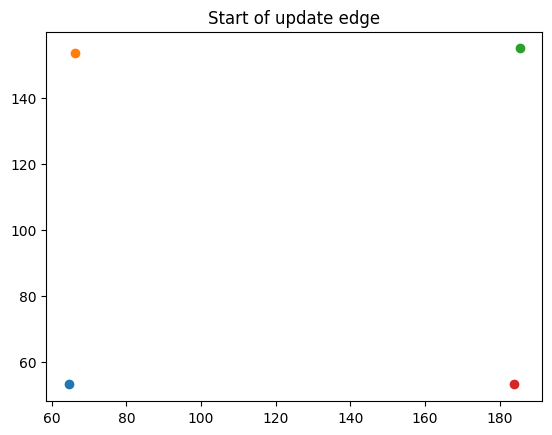

[64.51200104 53.2007103 ]
[64.51200104 53.2007103 ]
[64.51200104 53.2007103   1.        ]
CORNER SHAPE (2,)
[ 66.21866608 153.46358871]
[ 66.21866608 153.46358871]
[ 66.21866608 153.46358871   1.        ]
CORNER SHAPE (2,)
[185.34399414 154.82771301]
[185.34399414 154.82771301]
[185.34399414 154.82771301   1.        ]
CORNER SHAPE (2,)
[183.97866821  53.2007103 ]
[183.97866821  53.2007103 ]
[183.97866821  53.2007103    1.        ]
CORNER SHAPE (2,)


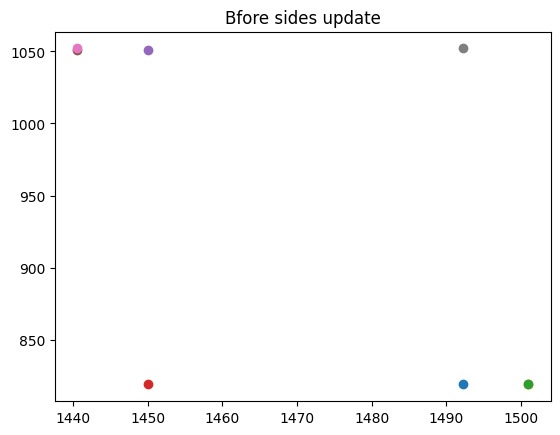

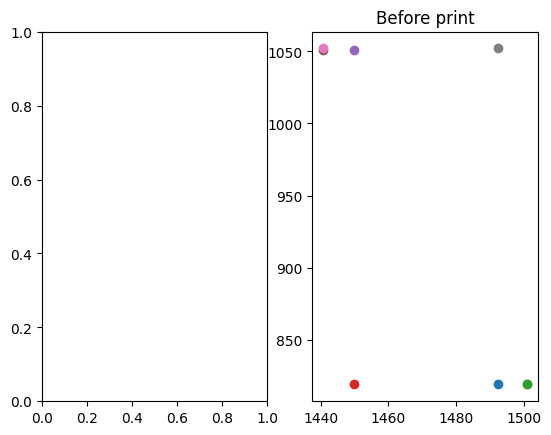

Edges
(2,)
[ 698.4523921  2697.40219103]
[ 711.08254353 2242.59327075]
(2,)
[ 711.08254353 2242.59327075]
[ 736.96074868 2244.28655809]
(2,)
[ 736.96074868 2244.28655809]
[ 724.72122419 2697.73064193]
(2,)
[ 724.72122419 2697.73064193]
[ 698.4523921  2697.40219103]


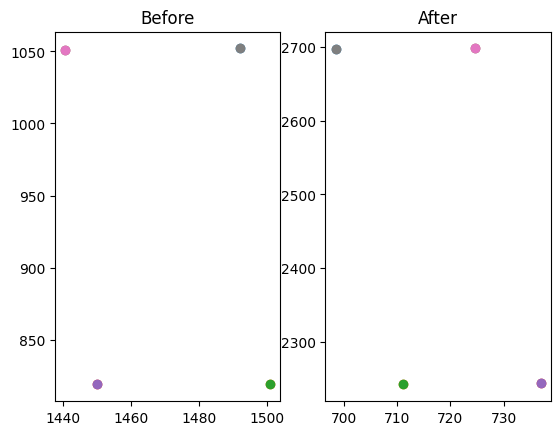

done inserting!


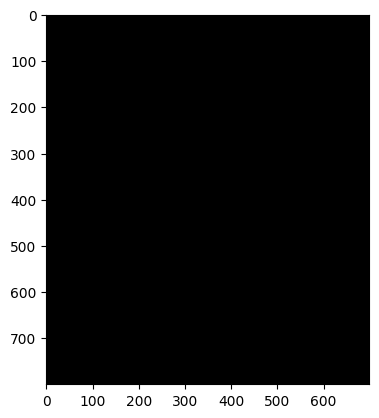

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from classes import *


puzzle = Puzzle(MATCH_IMGS)

#testing the corner piece
corner_piece = puzzle.pieces[3]
# corner_piece.piece_type = "corner"
corner_piece.insert()

# corner piece coordinates
print("Corner Piece Coordinates:")
print(corner_piece.dst.shape) 

if corner_piece.dst.dtype == np.float32:
    corner_piece.dst = (corner_piece.dst * 255).astype(np.uint8)

# Overlay the corner piece on the canvas
canvas = cv2.add(canvas, corner_piece.dst)

# Insert edge pieces and check their coordinates
edge_indices = [6, 44, 31]  # Example indices for edge pieces
for index in edge_indices:
    edge_piece = puzzle.pieces[index]
    # edge_piece.piece_type = "edge"
    edge_piece.insert()
    
    # Print edge piece coordinates
    # print(f"Edge Piece {index} Coordinates:")
    # print(edge_piece.dst.shape)  # Check the dimensions of the image

    # Convert edge piece to uint8 if necessary
    if edge_piece.dst.dtype == np.float32:
        edge_piece.dst = (edge_piece.dst * 255).astype(np.uint8)
        plt.imshow(edge_piece.dst)
        plt.show()
    canvas = cv2.add(canvas, edge_piece.dst)

# interior_piece = puzzle.pieces[37]
# interior_piece.insert()
# if interior_piece.dst.dtype == np.float32:
#     interior_piece.dst = (interior_piece.dst * 255).astype(np.uint8)

# canvas = cv2.add(canvas, interior_piece.dst)
# Display the result

# plt.imshow(canvas)  # Ensure canvas has three channels for color
# plt.show()
